## Pandas 기본 사용법

#### 데이터프레임 만들기

In [ ]:
# pandas import 하기
import pandas as pd

In [ ]:
# 시리즈
pd.Series({"이름":1, 
              "나이":2,
              "소속":3})

이름    1
나이    2
소속    3
dtype: int64

In [ ]:
# 딕셔너리를 DataFrame 함수의 인자로 전달
df = pd.DataFrame({"이름":['손흥민', '메시', '호날두'],
              "나이":[30, 37, 35],
              "소속":['토트넘', '파리생제르망', '맨유']},
              index=[1,2,3])
df

,이름,나이,소속
1,손흥민,30,토트넘
2,메시,37,파리생제르망
3,호날두,35,맨유


In [ ]:
# 리스트 안의 리스트 -> 칼럼 이름을 정하기

df1 = pd.DataFrame([['손흥민', 30, '토트넘'],
                    ['메시', 37, '파리생제르망'],
                    ['호날두', 35, '맨유']],
                    columns=['이름', '나이', '소속'],
                   index=[1,2,3])
df1

,이름,나이,소속
1,손흥민,30,토트넘
2,메시,37,파리생제르망
3,호날두,35,맨유


#### 행인덱스와 열인덱스 확인하고 변경하기

In [ ]:
df.index

Int64Index([1, 2, 3], dtype='int64')

In [ ]:
df.columns

Index(['이름', '나이', '소속'], dtype='object')

In [ ]:
df.index=['가', '나', '다']
df

,이름,나이,소속
가,손흥민,30,토트넘
나,메시,37,파리생제르망
다,호날두,35,맨유


In [ ]:
df.columns=['name', 'age', 'team']
df

,name,age,team
가,손흥민,30,토트넘
나,메시,37,파리생제르망
다,호날두,35,맨유


#### 특정 인덱스와 칼럼 이름 바꾸기
`df.rename(index={old:new})`  
`df.rename(columns={old:new})`

In [ ]:
df.rename(columns={'team': 'club'})

,name,age,club
가,손흥민,30,토트넘
나,메시,37,파리생제르망
다,호날두,35,맨유


In [ ]:
df

,name,age,team
가,손흥민,30,토트넘
나,메시,37,파리생제르망
다,호날두,35,맨유


In [ ]:
# 실행 결과를 저장하기 - 방법 1

df = df.rename(columns={'team': 'club'})
df

,name,age,club
가,손흥민,30,토트넘
나,메시,37,파리생제르망
다,호날두,35,맨유


In [ ]:
# 실행 결과를 저장하기 - 방법 2
df1.rename(columns={'team': 'club'}, inplace=True)
df1

,이름,나이,소속
1,손흥민,30,토트넘
2,메시,37,파리생제르망
3,호날두,35,맨유


#### 인덱스를 특정 칼럼으로 바꾸기
`df.set_index('칼럼이름')`

In [ ]:
df.set_index('name', inplace=True)

In [ ]:
df

,age,club
name,,
손흥민,30,토트넘
메시,37,파리생제르망
호날두,35,맨유


#### 행선택하기

- 하나의 행 선택 (인덱싱)
   - `df.iloc[인덱스 번호]`
   - `df.loc['행이름']`

- 두 개 이상의 선택 (슬라이싱)
   - `df.iloc[시작행 인덱스:끝행 인덱스]` - 끝행은 포함X
   - `df.loc['시작행':'끝행']`

In [ ]:
df.iloc[0]

age      30
club    토트넘
Name: 손흥민, dtype: object

In [ ]:
df.loc['메시'] 

age         37
club    파리생제르망
Name: 메시, dtype: object

In [ ]:
df.loc['메시'] == df.iloc[1]

age     True
club    True
Name: 메시, dtype: bool

In [ ]:
# 행 추가

df.loc['홀란드'] = [22, '맨시티']
df

,age,club
name,,
손흥민,30,토트넘
메시,37,파리생제르망
호날두,35,맨유
홀란드,22,맨시티


In [ ]:
# 범위 선택 : 손흥민부터 호날두까지
df.loc['손흥민': '호날두']

,age,club
name,,
손흥민,30,토트넘
메시,37,파리생제르망
호날두,35,맨유


In [ ]:
df.iloc[:3]

,age,club
name,,
손흥민,30,토트넘
메시,37,파리생제르망
호날두,35,맨유


#### 열선택하기
#### 행선택하기

- 하나의 열 선택 
   - `df.열이름`
   - `df['열이름']`

- 두 개 이상의 열 선택  
   - `df[['열이름', '열이름']]`

In [ ]:
df.age

name
손흥민    30
메시     37
호날두    35
홀란드    22
Name: age, dtype: int64

In [ ]:
df['age']

name
손흥민    30
메시     37
호날두    35
홀란드    22
Name: age, dtype: int64

In [ ]:
# 데이터프레임으로 하나의 열을 표시하기

df[['age']]

,age
name,
손흥민,30
메시,37
호날두,35
홀란드,22


In [ ]:
df[['age', 'club']]

,age,club
name,,
손흥민,30,토트넘
메시,37,파리생제르망
호날두,35,맨유
홀란드,22,맨시티


In [ ]:
# 열 추가

df['nation'] = ['Korea', 'Argentina', 'Portuga', 'Norway']
df

,age,club,nation
name,,,
손흥민,30,토트넘,Korea
메시,37,파리생제르망,Argentina
호날두,35,맨유,Portuga
홀란드,22,맨시티,Norway


In [ ]:
df[['age', 'nation']]

,age,nation
name,,
손흥민,30,Korea
메시,37,Argentina
호날두,35,Portuga
홀란드,22,Norway


#### 칼럼이름으로 정렬하기
`df.sort_values('열이름', inplace=True)`

In [ ]:
# 인덱스 정렬
df.sort_index()

,age,club,nation
name,,,
메시,37,파리생제르망,Argentina
손흥민,30,토트넘,Korea
호날두,35,맨유,Portuga
홀란드,22,맨시티,Norway


In [ ]:
# 칼럼이름으로 정렬
df.sort_values('age', inplace=True)


In [ ]:
df

,age,club,nation
name,,,
홀란드,22,맨시티,Norway
손흥민,30,토트넘,Korea
호날두,35,맨유,Portuga
메시,37,파리생제르망,Argentina


In [ ]:
# 나이 많은 순으로 정렬하기

df.sort_values(by='age', ascending=False,inplace=True)
df

,age,club,nation
name,,,
메시,37,파리생제르망,Argentina
호날두,35,맨유,Portuga
손흥민,30,토트넘,Korea
홀란드,22,맨시티,Norway


#### 행과 열을 삭제하기

`df.drop('행이름', axis=0)` - axis를 생략가능  
`df.drop('열이름', axis=1)`

In [ ]:
df.drop('호날두')

,age,club,nation
name,,,
메시,37,파리생제르망,Argentina
손흥민,30,토트넘,Korea
홀란드,22,맨시티,Norway


In [ ]:
df.drop('age', axis=1, inplace=True)
df

,club,nation
name,,
메시,파리생제르망,Argentina
호날두,맨유,Portuga
손흥민,토트넘,Korea
홀란드,맨시티,Norway


#### 원소를 선택하고 변경하기

`df.loc[행이름, 열이름]`  
`df.iloc[행인덱스, 열인덱스]`

In [ ]:
df.loc['손흥민', 'nation']

'Korea'

In [ ]:
# 이것도 가능..
df.loc['손흥민']['nation']

'Korea'

In [ ]:
df.iloc[2,1]

'Korea'

In [ ]:
# 홀란드 국적 England 추가하기

df.loc['홀란드', 'nation'] = 'Norway, England'
df

,club,nation
name,,
메시,파리생제르망,Argentina
호날두,맨유,Portuga
손흥민,토트넘,Korea
홀란드,맨시티,"Norway, England"


### 정리
Pandas Cheat Sheet
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

### 축구선수 몸값 데이터 분석

In [ ]:
df_player = pd.read_excel('/content/tranfermarket50.xlsx')
df_player

,number,name,postion,age,nation,team,value
0,1,Kylian Mbappé,Centre-Forward,23,France,Paris Saint-Germain,€160.00m
1,2,Erling Haaland,Centre-Forward,22,"Norway, England",Manchester City,€150.00m
2,3,Vinicius Junior,Left Winger,22,"Brazil, Spain",Real Madrid,€120.00m
3,4,Pedri,Central Midfield,19,Spain,FC Barcelona,€90.00m
4,5,Jude Bellingham,Central Midfield,19,England,Borussia Dortmund,€90.00m
5,6,Phil Foden,Central Midfield,22,England,Manchester City,€90.00m
6,7,Mohamed Salah,Right Winger,30,Egypt,Liverpool FC,€90.00m
7,8,Harry Kane,Centre-Forward,29,England,Tottenham Hotspur,€90.00m
8,9,Dušan Vlahović,Centre-Forward,22,Serbia,Juventus FC,€85.00m
9,10,Bruno Fernandes,Attacking Midfield,28,Portugal,Manchester United,€85.00m


In [ ]:
# 행과 열의 개수 확인

df_player.shape

(50, 7)

In [ ]:
# 기본 정보 확인 
df_player.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   number   50 non-null     int64 
 1   name     50 non-null     object
 2   postion  50 non-null     object
 3   age      50 non-null     int64 
 4   nation   50 non-null     object
 5   team     50 non-null     object
 6   value    50 non-null     object
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


In [ ]:
# 처음 나오는 5개 확인

df_player.head(10)

,number,name,postion,age,nation,team,value
0,1,Kylian Mbappé,Centre-Forward,23,France,Paris Saint-Germain,€160.00m
1,2,Erling Haaland,Centre-Forward,22,"Norway, England",Manchester City,€150.00m
2,3,Vinicius Junior,Left Winger,22,"Brazil, Spain",Real Madrid,€120.00m
3,4,Pedri,Central Midfield,19,Spain,FC Barcelona,€90.00m
4,5,Jude Bellingham,Central Midfield,19,England,Borussia Dortmund,€90.00m
5,6,Phil Foden,Central Midfield,22,England,Manchester City,€90.00m
6,7,Mohamed Salah,Right Winger,30,Egypt,Liverpool FC,€90.00m
7,8,Harry Kane,Centre-Forward,29,England,Tottenham Hotspur,€90.00m
8,9,Dušan Vlahović,Centre-Forward,22,Serbia,Juventus FC,€85.00m
9,10,Bruno Fernandes,Attacking Midfield,28,Portugal,Manchester United,€85.00m


In [ ]:
df_player.tail()

,number,name,postion,age,nation,team,value
45,46,Achraf Hakimi,Right-Back,23,"Morocco, Spain",Paris Saint-Germain,€65.00m
46,47,Gabriel Jesus,Centre-Forward,25,Brazil,Arsenal FC,€65.00m
47,48,Federico Chiesa,Right Winger,25,Italy,Juventus FC,€65.00m
48,49,Andrew Robertson,Left-Back,28,Scotland,Liverpool FC,€65.00m
49,50,Milan Skriniar,Centre-Back,27,Slovakia,Inter Milan,€65.00m


#### 복사해두기

In [ ]:
df2 = df_player.copy()
df2

,number,name,postion,age,nation,team,value
0,1,Kylian Mbappé,Centre-Forward,23,France,Paris Saint-Germain,€160.00m
1,2,Erling Haaland,Centre-Forward,22,"Norway, England",Manchester City,€150.00m
2,3,Vinicius Junior,Left Winger,22,"Brazil, Spain",Real Madrid,€120.00m
3,4,Pedri,Central Midfield,19,Spain,FC Barcelona,€90.00m
4,5,Jude Bellingham,Central Midfield,19,England,Borussia Dortmund,€90.00m
5,6,Phil Foden,Central Midfield,22,England,Manchester City,€90.00m
6,7,Mohamed Salah,Right Winger,30,Egypt,Liverpool FC,€90.00m
7,8,Harry Kane,Centre-Forward,29,England,Tottenham Hotspur,€90.00m
8,9,Dušan Vlahović,Centre-Forward,22,Serbia,Juventus FC,€85.00m
9,10,Bruno Fernandes,Attacking Midfield,28,Portugal,Manchester United,€85.00m


In [ ]:
# 인덱스를 넘버로 바꾸기
df2 = df2.set_index('number')
df2.head()

,name,postion,age,nation,team,value
number,,,,,,
1,Kylian Mbappé,Centre-Forward,23,France,Paris Saint-Germain,€160.00m
2,Erling Haaland,Centre-Forward,22,"Norway, England",Manchester City,€150.00m
3,Vinicius Junior,Left Winger,22,"Brazil, Spain",Real Madrid,€120.00m
4,Pedri,Central Midfield,19,Spain,FC Barcelona,€90.00m
5,Jude Bellingham,Central Midfield,19,England,Borussia Dortmund,€90.00m


In [ ]:
# 1등부터 10등까지 선수 이름과 시장가치만 보기

df2.loc[1:10, ['name', 'value']]

,name,value
number,,
1,Kylian Mbappé,€160.00m
2,Erling Haaland,€150.00m
3,Vinicius Junior,€120.00m
4,Pedri,€90.00m
5,Jude Bellingham,€90.00m
6,Phil Foden,€90.00m
7,Mohamed Salah,€90.00m
8,Harry Kane,€90.00m
9,Dušan Vlahović,€85.00m


In [ ]:
# 1등부터 10등까지 선수 이름과 시장가치만 보기

df2[['name', 'value']].head(10)

,name,value
number,,
1,Kylian Mbappé,€160.00m
2,Erling Haaland,€150.00m
3,Vinicius Junior,€120.00m
4,Pedri,€90.00m
5,Jude Bellingham,€90.00m
6,Phil Foden,€90.00m
7,Mohamed Salah,€90.00m
8,Harry Kane,€90.00m
9,Dušan Vlahović,€85.00m


In [ ]:
# 나이가 20세 이하인 선수들만 보기

df2['age'] <= 20

number
1     False
2     False
3     False
4      True
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29     True
30     True
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
Name: age, dtype: bool

In [ ]:
df2[df2['age'] <= 20]

,name,postion,age,nation,team,value
number,,,,,,
4,Pedri,Central Midfield,19,Spain,FC Barcelona,€90.00m
5,Jude Bellingham,Central Midfield,19,England,Borussia Dortmund,€90.00m
12,Jamal Musiala,Attacking Midfield,19,"Germany, England",Bayern Munich,€80.00m
29,Gavi,Central Midfield,18,Spain,FC Barcelona,€70.00m
30,Florian Wirtz,Attacking Midfield,19,Germany,Bayer 04 Leverkusen,€70.00m


In [ ]:
df2.team.value_counts()

Manchester City        7
Liverpool FC           5
Paris Saint-Germain    4
Chelsea FC             4
Inter Milan            4
Bayern Munich          4
Real Madrid            4
Manchester United      3
Tottenham Hotspur      2
Juventus FC            2
FC Barcelona           2
Arsenal FC             2
Borussia Dortmund      1
West Ham United        1
RB Leipzig             1
Bayer 04 Leverkusen    1
Atlético de Madrid     1
AC Milan               1
SSC Napoli             1
Name: team, dtype: int64

In [ ]:
# 소속팀이 토트넘인 선수들 보기

df2[df2['team'] == 'Tottenham Hotspur']

,name,postion,age,nation,team,value
number,,,,,,
8,Harry Kane,Centre-Forward,29,England,Tottenham Hotspur,€90.00m
27,Heung-min Son,Left Winger,30,"Korea, South",Tottenham Hotspur,€75.00m


In [ ]:
# 나이가 30세 이상인 선수들의 이름과 나이와 시장가치만 추출해서 보여주기

df2.loc[df2['age'] >=30, ['name', 'age', 'value']]

,name,age,value
number,,,
7,Mohamed Salah,30,€90.00m
11,Kevin De Bruyne,31,€85.00m
27,Heung-min Son,30,€75.00m
28,Neymar,30,€75.00m


#### 데이터 전처리 
- 시장가치를 숫자형 데이터로 바꾸기
- 한국돈으로 바꾸기

In [ ]:
s = '€90.00m'

s = s.replace('€', '')
s = s.replace('m', '')
s

'90.00'

In [ ]:
df2['value'] = df2['value'].str.replace('€', '')
df2['value'] = df2['value'].str.replace('m', '')


In [ ]:
df2['value']=df2['value'].astype('float')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     50 non-null     object 
 1   postion  50 non-null     object 
 2   age      50 non-null     int64  
 3   nation   50 non-null     object 
 4   team     50 non-null     object 
 5   value    50 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
df2.head(3)

,name,postion,age,nation,team,value
number,,,,,,
1,Kylian Mbappé,Centre-Forward,23,France,Paris Saint-Germain,160.0
2,Erling Haaland,Centre-Forward,22,"Norway, England",Manchester City,150.0
3,Vinicius Junior,Left Winger,22,"Brazil, Spain",Real Madrid,120.0


In [ ]:
# 한국 돈으로 바꾸기

#억 = value * 14.2
df2['시장가치(억)'] = df2['value'] * 14.2
df2.head()

,name,postion,age,nation,team,value,시장가치(억)
number,,,,,,,
1,Kylian Mbappé,Centre-Forward,23,France,Paris Saint-Germain,160.0,2272.0
2,Erling Haaland,Centre-Forward,22,"Norway, England",Manchester City,150.0,2130.0
3,Vinicius Junior,Left Winger,22,"Brazil, Spain",Real Madrid,120.0,1704.0
4,Pedri,Central Midfield,19,Spain,FC Barcelona,90.0,1278.0
5,Jude Bellingham,Central Midfield,19,England,Borussia Dortmund,90.0,1278.0


In [ ]:
# value 칼럼 삭제

# df2.drop('value', axis=1, inplace=True)
df2.drop(columns='value', inplace=True)
df2.head()

,name,postion,age,nation,team,시장가치(억)
number,,,,,,
1,Kylian Mbappé,Centre-Forward,23,France,Paris Saint-Germain,2272.0
2,Erling Haaland,Centre-Forward,22,"Norway, England",Manchester City,2130.0
3,Vinicius Junior,Left Winger,22,"Brazil, Spain",Real Madrid,1704.0
4,Pedri,Central Midfield,19,Spain,FC Barcelona,1278.0
5,Jude Bellingham,Central Midfield,19,England,Borussia Dortmund,1278.0


#### 통계 구하기

In [ ]:
# 수치형 데이터의 통계
df2.describe()

,age,시장가치(억)
count,50.000000,50.000000
mean,24.160000,1124.640000
std,3.284845,262.290442
min,18.000000,923.000000
25%,22.000000,994.000000
50%,23.000000,1065.000000
75%,27.000000,1136.000000
max,31.000000,2272.000000


In [ ]:
# 50명 몸값을 다 더하면?

df2['시장가치(억)'].sum()

56232.0

In [ ]:
# 선수들이 가장 많이 속한 팀, 나라?

df2['nation'].mode()

0    England
dtype: object

In [ ]:
# 영국 출신 선수들만 가져오기

df2[df2['nation'] == 'England']

,name,postion,age,nation,team,시장가치(억)
number,,,,,,
5,Jude Bellingham,Central Midfield,19,England,Borussia Dortmund,1278.0
6,Phil Foden,Central Midfield,22,England,Manchester City,1278.0
8,Harry Kane,Centre-Forward,29,England,Tottenham Hotspur,1278.0
18,Trent Alexander-Arnold,Right-Back,24,England,Liverpool FC,1136.0
25,Mason Mount,Attacking Midfield,23,England,Chelsea FC,1065.0


In [ ]:
# 국가별 선수 수

df2['nation'].value_counts()

England                         5
Portugal                        4
Spain                           3
Brazil                          3
Germany                         3
England, Ireland                2
Brazil, Spain                   2
Italy                           2
France                          1
Portugal, Angola                1
Netherlands                     1
Brazil, Portugal                1
Belgium, DR Congo               1
England, Jamaica                1
England, Nigeria                1
France, Cote d'Ivoire           1
Nigeria                         1
Morocco, Spain                  1
Scotland                        1
Canada, Liberia                 1
Argentina                       1
Uruguay                         1
Korea, South                    1
England, Trinidad and Tobago    1
Norway, England                 1
Colombia                        1
France, DR Congo                1
Uruguay, Spain                  1
France, Cameroon                1
Germany, Engla

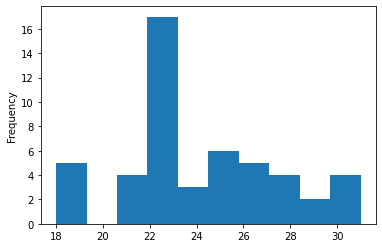

In [ ]:
df2.age.plot.hist()